<a href="https://colab.research.google.com/github/guizuccolotto/An-lise-Desempenho-Ben-Simmons/blob/master/Analise_NBA_Win.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from lxml import html
import requests
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

In [2]:
nba_dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NBA_19_20.xlsx')

In [3]:
nba_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEAM    30 non-null     object 
 1   GP      30 non-null     int64  
 2   W       30 non-null     int64  
 3   L       30 non-null     int64  
 4   WIN%    30 non-null     float64
 5   MIN     30 non-null     float64
 6   PTS     30 non-null     float64
 7   FGM     30 non-null     float64
 8   FGA     30 non-null     float64
 9   FG%     30 non-null     float64
 10  3PM     30 non-null     float64
 11  3PA     30 non-null     float64
 12  3P%     30 non-null     float64
 13  FTM     30 non-null     float64
 14  FTA     30 non-null     float64
 15  FT%     30 non-null     float64
 16  OREB    30 non-null     float64
 17  DREB    30 non-null     float64
 18  REB     30 non-null     float64
 19  AST     30 non-null     float64
 20  TOV     30 non-null     float64
 21  STL     30 non-null     float64
 22  BLK 

### **Descritivo das Variáveis da Tabela de Dados**

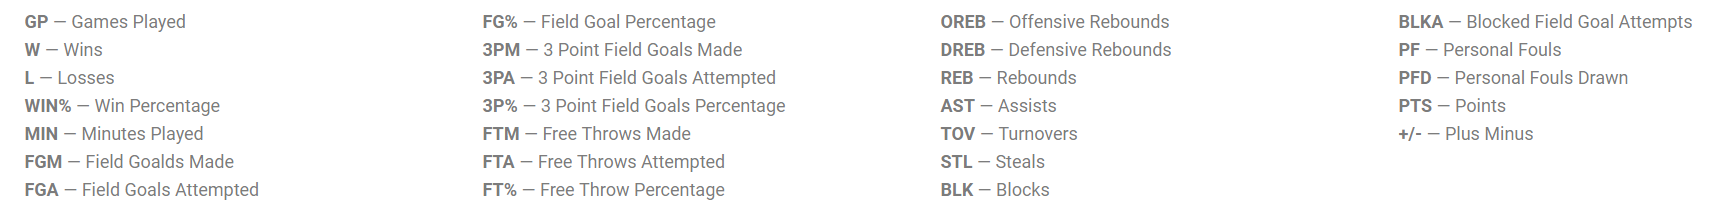

In [4]:
nba_dados.describe()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,69.600000,34.80000,34.800000,0.496167,48.353333,111.656667,40.813333,88.790000,45.973333,12.180000,34.056667,35.760000,17.856667,23.116667,77.246667,10.080000,34.700000,44.783333,24.353333,14.553333,7.656667,4.896667,4.906667,20.780000,20.766667,-0.130000
std,2.774266,11.67786,9.956457,0.157188,0.165536,3.920123,1.339772,2.011407,1.222189,1.464617,3.950616,1.431565,1.601870,1.781724,2.973879,0.840525,2.111218,2.178117,1.692118,1.065358,0.881098,0.736480,0.667436,1.302359,1.084160,4.947877
min,64.000000,15.00000,16.000000,0.231000,48.100000,102.900000,37.300000,84.300000,43.400000,9.600000,27.800000,33.300000,15.100000,19.200000,69.400000,8.100000,31.400000,41.700000,20.500000,12.600000,6.100000,3.200000,3.700000,18.300000,18.800000,-8.700000
25%,67.750000,23.25000,27.000000,0.342000,48.200000,109.550000,40.000000,88.025000,44.975000,11.000000,31.425000,34.800000,16.600000,22.075000,75.300000,9.725000,33.400000,42.925000,23.300000,13.875000,7.225000,4.500000,4.500000,19.625000,20.025000,-3.475000
50%,71.000000,33.50000,38.500000,0.462000,48.400000,112.050000,40.850000,88.800000,46.200000,12.050000,33.750000,35.700000,17.950000,23.300000,77.700000,10.200000,34.550000,44.700000,24.250000,14.700000,7.700000,4.900000,4.900000,20.900000,20.650000,-0.800000
75%,71.000000,43.75000,42.750000,0.618500,48.500000,114.075000,42.000000,90.525000,46.875000,13.250000,35.900000,36.800000,18.850000,24.400000,79.225000,10.600000,35.750000,45.925000,25.675000,15.200000,8.175000,5.450000,5.300000,21.775000,21.550000,3.100000
max,74.000000,56.00000,50.000000,0.778000,48.600000,118.800000,43.300000,91.700000,47.900000,15.700000,45.100000,38.100000,20.800000,26.200000,83.500000,12.000000,42.300000,51.800000,27.100000,16.500000,10.000000,6.700000,6.400000,23.100000,22.800000,10.400000


### Análise das Correlações e Variáveis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



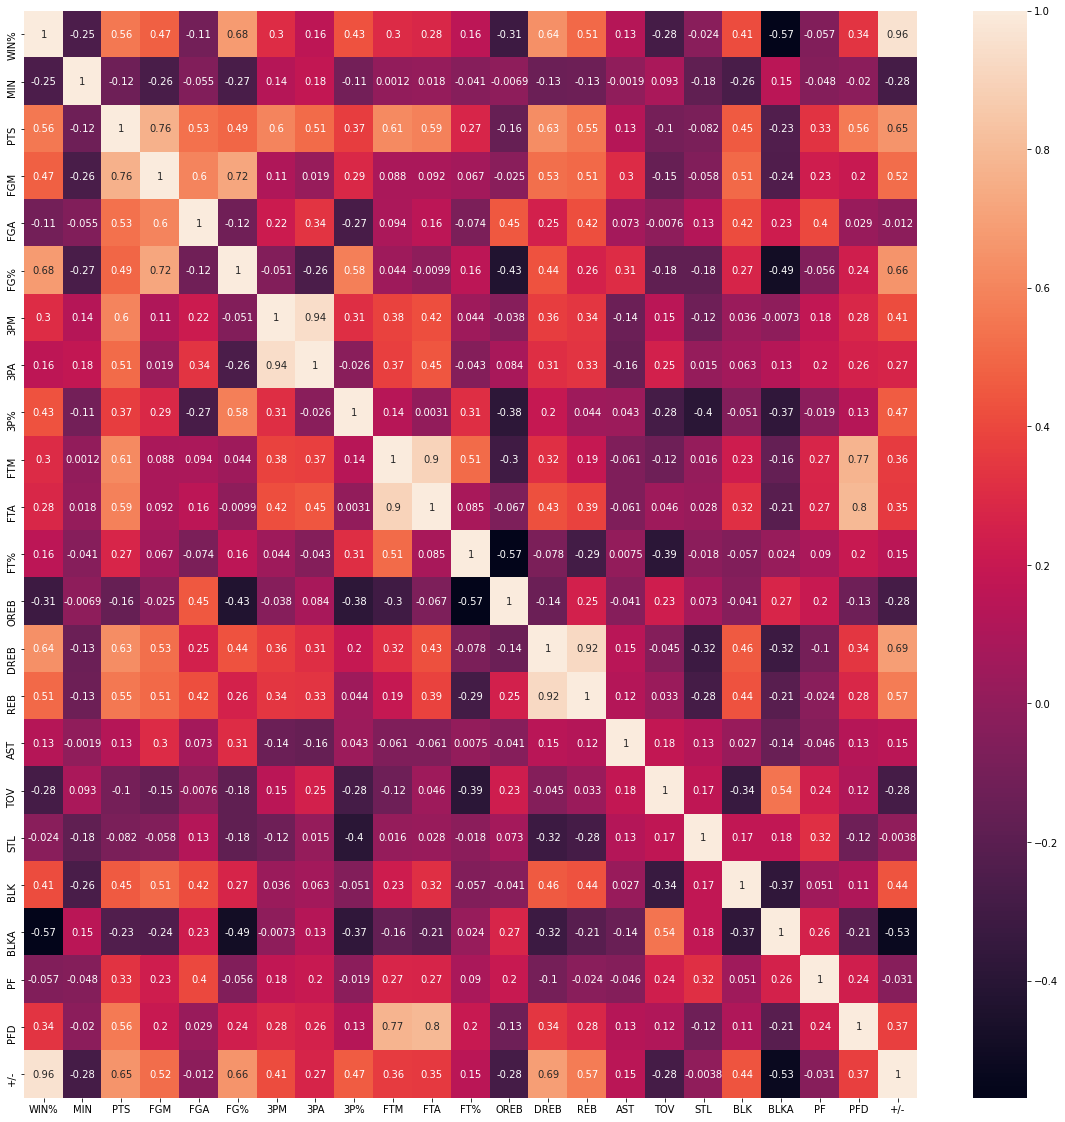

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

sns.heatmap(nba_dados.drop(columns=['GP','W','L']).corr(), annot=True)

Podemos notar que a estatística com a maior correlação ao % de vitórias é o **%FG** e **DREB**, % de Field Gol e Rebotes Defensivos na sequencia. 
Vamos fazer uma análise rápida olhando apenas o % de vitórias.
Vamos analisar as estatísticas **avançadas**

In [6]:
advanced = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NBA_expec.xlsx')

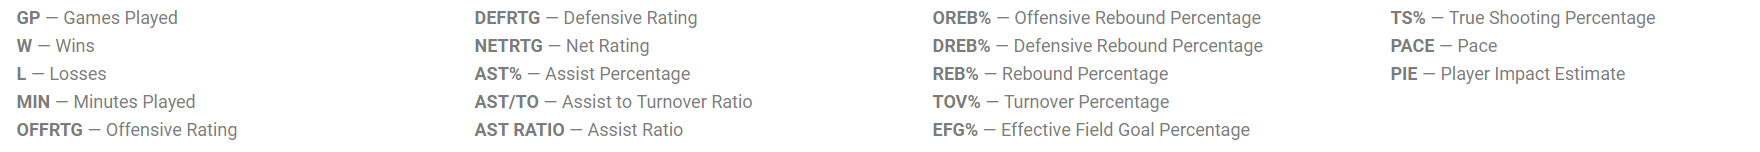

In [7]:
full = pd.merge(nba_dados[['TEAM','WIN%']], advanced, on='TEAM', how='inner')

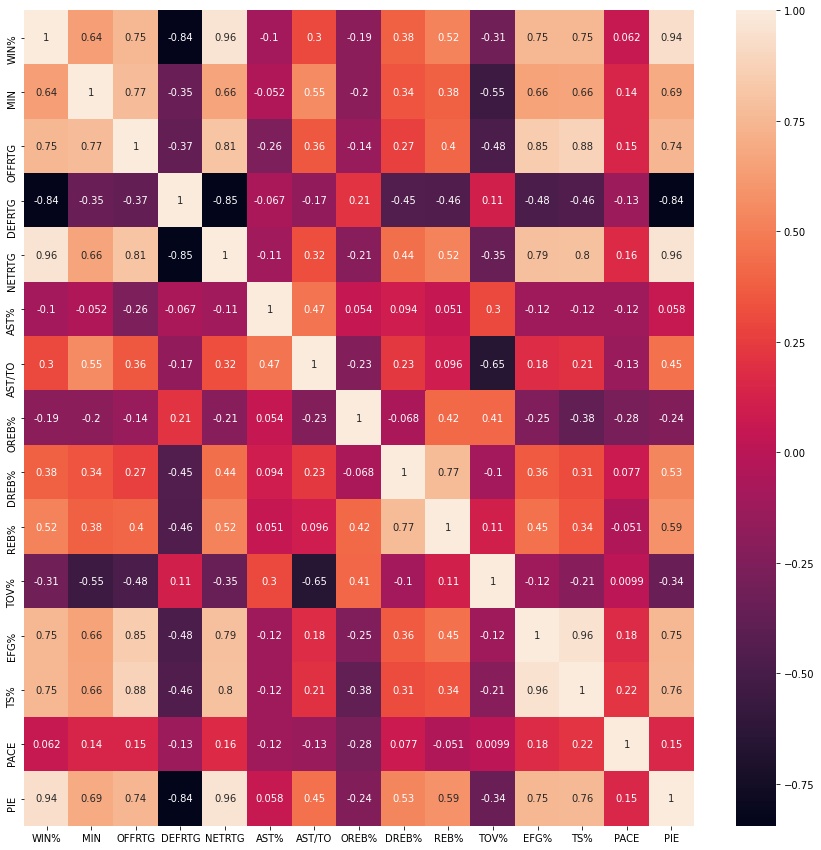

In [8]:
plt.figure(figsize=(15,15))

sns.heatmap(full.drop(columns=['GP','W','L']).corr(), annot=True)

In [9]:
cols = ['WIN%','PTS','FG%','FT%','3P%','OREB','DREB','BLKA']

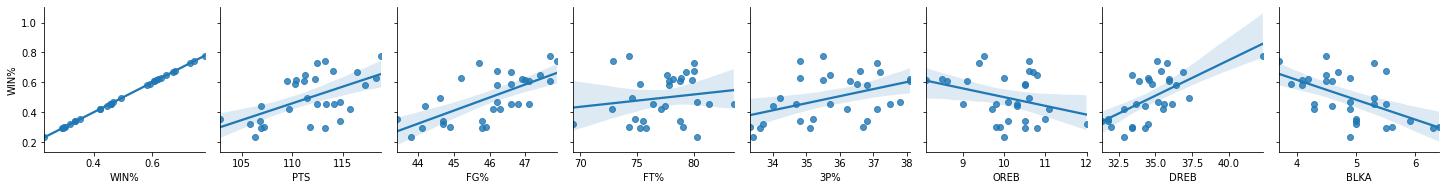

In [10]:
sns.pairplot(data=nba_dados.drop(columns=['GP','W','L']),
                  y_vars=['WIN%'],
                  x_vars=cols,
                  kind='reg')

In [11]:
cols_adv = ['NETRTG','EFG%','TS%']

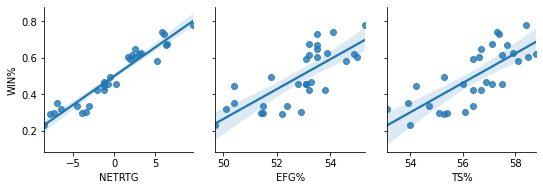

In [12]:
sns.pairplot(data=full.drop(columns=['GP','W','L']),
                  y_vars=['WIN%'],
                  x_vars=cols_adv,
                  kind='reg')

In [13]:
fig = px.scatter(full, x="EFG%", y="TS%", hover_name="TEAM")
fig.show()

Com essas variáveis em mente, vamos analisar os jogadores que tem perfil de um bom aproveitamento de %FG e os maiores reboteiros

In [14]:
jogadores = pd.read_excel('/content/drive/My Drive/Colab Notebooks/players.xlsx')

In [15]:
jogadores.head()

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3
1,Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4
2,Damian Lillard,65,37.4,29.8,9.4,20.4,46.0,4.0,10.2,39.7,7.0,7.8,88.8,0.5,3.8,4.3,8.0,1.0,0.3,3.0,28.6
3,Trae Young,60,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,0.5,3.7,4.3,9.3,1.1,0.1,4.8,26.6
4,Giannis Antetokounmpo,63,30.4,29.5,10.9,19.7,55.3,1.4,4.7,30.4,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,34.6


Vamos plotar os jogadores nessas 2 variáveis

In [16]:
jogadores.set_index("PLAYER", inplace=True)

Vamos fazer um cut pelos minutos jogados, para entender o impacto dos jogadores dentro dessas métricas de acompanhamento

In [17]:
jogadores['faixa_tempo'] = pd.cut(jogadores['MIN'], 5)

In [18]:
jogadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, James Harden to Matthew Dellavedova
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GP           262 non-null    int64   
 1   MIN          262 non-null    float64 
 2   PTS          262 non-null    float64 
 3   FGM          262 non-null    float64 
 4   FGA          262 non-null    float64 
 5   FG%          262 non-null    float64 
 6   3PM          262 non-null    float64 
 7   3PA          262 non-null    float64 
 8   3P%          262 non-null    float64 
 9   FTM          262 non-null    float64 
 10  FTA          262 non-null    float64 
 11  FT%          262 non-null    float64 
 12  OREB         262 non-null    float64 
 13  DREB         262 non-null    float64 
 14  REB          262 non-null    float64 
 15  AST          262 non-null    float64 
 16  STL          262 non-null    float64 
 17  BLK          262 non-null    float64 
 18  TOV     

In [19]:
fig = px.scatter(jogadores, x="FG%", y="DREB", color="faixa_tempo")
fig.show()

Fazendo uma análise dos jogadores por tempo, podemos ver que temos jogadores suficientes que tem bons rebotes e boms percentuais de field goal, agora vamos ver como está a distribuição de tempo desses jogadores

In [20]:
fig = px.scatter(jogadores, x="FG%", y="DREB", color="faixa_tempo", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

Podemos notar que jogadores com bastante tempo de quadra, tem perfis de rebote bem distintos, mesmo com a faixa de **FG%** bem comportada. Vamos tentar quebrar por posição de jogadores para entender se a distribuição vai mudar.

In [21]:
position = pd.read_excel('/content/drive/My Drive/Colab Notebooks/position.xlsx').rename(columns={"Player":"PLAYER"}).set_index("PLAYER")

In [22]:
position.head(2)

,Pos,Age,Tm
PLAYER,,,
Steven Adams,C,26,OKC
Bam Adebayo,PF,22,MIA


In [23]:
jogadores.head(2)

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo
PLAYER,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]"
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]"


In [24]:
player_position = pd.merge(jogadores,position,on='PLAYER',how='left')

In [25]:
player_position.head(3)

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]",SG,30.0,HOU
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]",SG,26.0,WAS
Damian Lillard,65,37.4,29.8,9.4,20.4,46.0,4.0,10.2,39.7,7.0,7.8,88.8,0.5,3.8,4.3,8.0,1.0,0.3,3.0,28.6,"(31.6, 37.4]",PG,29.0,POR


In [26]:
player_position['Pos'].fillna('nd', inplace=True)
player_position['Tm'].fillna('nd', inplace=True)

In [27]:
to_graph = player_position.reset_index().copy()

fig = px.scatter(to_graph, x="FG%", y="DREB", color="Pos",
                 hover_name="PLAYER", size='MIN')
fig.show()

#,range_x=[player_position["FG%"].min(),player_position["FG%"].max()],range_y=[player_position["DREB"].min(),player_position["DREB"].max()]

Fazendo a distribuição dessa maneira, podemos cortar um limiar de jogadores que podem ter mais impacto nessas variáveis que são variáveis que nós achamos impactantes na vitória.

Antes de continuarmos com a análise dos jogadores, nós temos que diferenciar as posições de jogadores, como a informação de rebote é uma informação importante, é de se esperar que os jogadores de posição **C, PF** tendem a ter valores de rebotes mais altos, então suas médias podem ser maiores do que os demais jogadores. 
Vamos criar umas categorias. 

In [28]:
player_position.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]",SG,30.0,HOU
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]",SG,26.0,WAS
Damian Lillard,65,37.4,29.8,9.4,20.4,46.0,4.0,10.2,39.7,7.0,7.8,88.8,0.5,3.8,4.3,8.0,1.0,0.3,3.0,28.6,"(31.6, 37.4]",PG,29.0,POR
Trae Young,60,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,0.5,3.7,4.3,9.3,1.1,0.1,4.8,26.6,"(31.6, 37.4]",PG,21.0,ATL
Giannis Antetokounmpo,63,30.4,29.5,10.9,19.7,55.3,1.4,4.7,30.4,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,34.6,"(25.8, 31.6]",PF,25.0,MIL


In [29]:
player_position.Pos.value_counts()

SG       74
PF       54
PG       54
C        52
SF       49
nd       23
SF-SG     2
PF-C      1
Name: Pos, dtype: int64

In [30]:
corte_pos = pd.DataFrame({"Pos":["SG","PG","PF","C","SF","nd","SF-SG","PF-C"],"Atua":["fora","fora","dentro","dentro","fora","fora","fora","dentro"]})

In [40]:
player_full = player_position.reset_index().merge(corte_pos, on="Pos", how="inner").set_index("PLAYER")


In [41]:
player_full.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm,Atua
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]",SG,30.0,HOU,fora
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]",SG,26.0,WAS,fora
Devin Booker,69,35.9,26.6,8.9,18.3,48.8,2.0,5.7,35.9,6.7,7.3,91.9,0.4,3.8,4.2,6.5,0.7,0.3,3.8,24.5,"(31.6, 37.4]",SG,23.0,PHO,fora
Zach LaVine,60,34.8,25.5,9.0,20.0,45.0,3.1,8.1,38.0,4.5,5.6,80.2,0.7,4.1,4.8,4.2,1.5,0.5,3.4,21.0,"(31.6, 37.4]",SG,24.0,CHI,fora
Donovan Mitchell,68,34.6,24.2,8.8,19.7,44.8,2.5,6.9,36.2,4.1,4.7,86.3,0.8,3.6,4.4,4.3,1.0,0.2,2.7,19.9,"(31.6, 37.4]",SG,23.0,UTA,fora


In [42]:
fig = px.scatter(player_full.reset_index(), x="FG%", y="DREB", color="Atua",
                 hover_name="PLAYER", size='MIN')
fig.show()

#,range_x=[player_position["FG%"].min(),player_position["FG%"].max()],range_y=[player_position["DREB"].min(),player_position["DREB"].max()]

Podemos notar que os jogadores que atuam dentro do garrafão, tem maiores estatísticas que contribuem com o par considerado **contribuição vencedora**.
Vamos fazer uma extratificação apenas dos clientes que atuam fora do garrafão, e analisar a sua contribuição para o jogo, comparando com a quantidade de minutos jogados por cada um.

In [43]:
to_graph = player_full[player_full['Atua'] == 'fora'].reset_index().copy()

fig = px.scatter(to_graph, x="FG%", y="DREB", color="Pos",
                 hover_name="PLAYER", size='MIN')
fig.show()

Vamos analisar as métricas dessas 2 variáveis para identificar o que consideramos o corte para jogadores que realmente impactam essa métrica, e jogadores que impactam menos essa métrica.

In [45]:
player_full[player_full['Atua'] == 'fora'][["FG%","DREB"]].describe()

,FG%,DREB
count,202.000000,202.000000
mean,43.705446,3.111386
std,4.106192,1.412143
min,33.300000,0.900000
25%,41.200000,2.000000
50%,43.600000,3.000000
75%,46.200000,3.800000
max,58.300000,8.600000


Vamos olhar mais profundamente para os jogadores que estão no quadrante acima da média em ambas as categorias.

<Figure size 1080x1080 with 0 Axes>

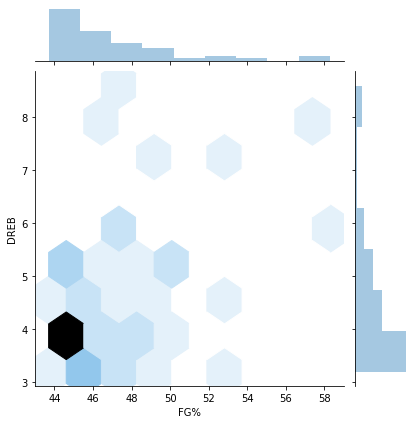

In [49]:
plt.figure(figsize=(15,15))
sns.jointplot(
    x="FG%",
    y="DREB",
    data=player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)],
    kind='hex'
)

In [50]:
to_graph =player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)].reset_index().copy()

fig = px.scatter(to_graph, x="FG%", y="DREB", color="Pos",
                 hover_name="PLAYER", size='MIN')
fig.show()

Podemos dizer que estes seriam os jogadores com **maior impacto** no WIN% dos times da NBA, considerando o par de características correlacionadas. 
Claro que esta é uma análise superficial, considerando apenas 2 variáveis simples, e sabemos que o impacto do jogo é muito mais complexo que apenas o **FG%** e **Defensive Rebound**.

Vamos olhar algumas quantidade e determinar quais jogadores tem mais impacto. 

In [51]:
extrato = player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)]

In [58]:
extrato.Pos.value_counts()

SF       16
SG       13
PG       12
nd        9
SF-SG     1
Name: Pos, dtype: int64

Temos muitos mais small-fowards que podem ser impactantes no **WIN%** do que as demais posições. Ainda sim temos 9 jogadores sem identificação pela nossa integração que vamos deixar por enquanto.

Vamos analisar os jogadores selecionados, e quais times eles representam.

In [62]:
extrato.index.unique()

Index(['James Harden', 'Bradley Beal', 'Devin Booker', 'Zach LaVine',
       'Donovan Mitchell', 'CJ McCollum', 'Andrew Wiggins', 'Jrue Holiday',
       'Shai Gilgeous-Alexander', 'Troy Brown Jr.', 'Donte DiVincenzo',
       'Bruce Brown', 'Pat Connaughton', 'Damian Lillard', 'Trae Young',
       'Russell Westbrook', 'LeBron James', 'De'Aaron Fox', 'Jamal Murray',
       'Chris Paul', 'Malcolm Brogdon', 'Ben Simmons', 'Eric Bledsoe',
       'Dejounte Murray', 'Kris Dunn', 'Luka Doncic', 'Nikola Jokic',
       'Bojan Bogdanovic', 'Nikola Vucevic', 'Dennis Schroder',
       'Marcus Morris Sr.', 'Jonas Valanciunas', 'Dario Saric',
       'Ersan Ilyasova', 'Kawhi Leonard', 'DeMar DeRozan', 'Khris Middleton',
       'Jaylen Brown', 'Jimmy Butler', 'T.J. Warren', 'Kelly Oubre Jr.',
       'Gordon Hayward', 'Will Barton', 'Joe Harris', 'OG Anunoby',
       'Joe Ingles', 'Trevor Ariza'],
      dtype='object', name='PLAYER')

In [66]:
extrato.Tm.value_counts()

nd     9
MIL    4
POR    3
WAS    2
UTA    2
SAC    2
DEN    2
TOT    2
OKC    2
HOU    2
IND    2
PHO    2
BOS    2
SAS    2
CHI    2
PHI    1
MIN    1
MIA    1
DET    1
GSW    1
TOR    1
BRK    1
NOP    1
LAC    1
ATL    1
LAL    1
Name: Tm, dtype: int64

Notamos que o time com mais jogadores de impacto nos critérios determinados foi o Bucks, o que condiz com o primeiro lugar que eles ocupam na tabela. 

Podemos dizer que é o time com mais jogadores que individualmente impactam o **WIN%** do time. 